<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(glove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [3]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
df3.columns = ["arti"]

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower2.txt', delimiter = "\t")
df4.columns = ["arti"]

persiapan corpus tambahan

In [97]:
dfg = pd.DataFrame(df2.tweet)
dfg.columns=["dok"]

In [7]:
dfg = pd.DataFrame(df3.arti)
dfg.columns=["dok"]

In [101]:
dfg = pd.DataFrame(df3.arti.append(df2.tweet,ignore_index=True))
dfg.columns=["dok"]

In [8]:
dfg

,dok
0,autism is disorder characterized by difficulti...
1,diffusely reflected sunlight relative to vario...
2,or is the first letter and the first vowel of ...
3,alabama is state in the southeastern region of...
4,pottery painting dating to bc of achilles duri...
...,...
20704,heuristic routing is system used to describe h...
20705,hierarchical routing is method of routing in n...
20706,high performance equipment describes equipment...
20707,hop is type of jump hop or hops may also refer...


preputama : lower case

In [9]:
def lower(temp):
  return temp.str.lower()

In [10]:
df['dokumen']=lower(df['dokumen'])

In [11]:
dfg['dok']=lower(dfg['dok'])

preputama : Pembersihan noise (over enter and space)

In [52]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [ ]:
df=bersih_noise(df)

In [ ]:
dfg=bersih_noise(dfg)

preptambah : expand contractions

In [53]:
!pip install contractions
import contractions
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

In [ ]:
df.dokumen=expand_word(df.dokumen)

In [ ]:
dfg.dok=expand_word(dfg.dok)

preputama : cleansing punctuation

In [54]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [ ]:
df['dokumen'] = clns_punc(df['dokumen'])

In [ ]:
dfg['dok'] = clns_punc(dfg['dok'])

preputama : cleansing number

In [55]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [ ]:
df.dokumen=clns_numb(df.dokumen)

In [ ]:
dfg.dok=clns_numb(dfg.dok)

preptambah : remove stopword

In [56]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [ ]:
dfg['dok'] = remove_stopw(dfg['dok'])

tokenizing

In [12]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [13]:
df.dokumen=token(df.dokumen)

In [14]:
dfg.dok=token(dfg.dok)

preptambah : Lemmatization

In [58]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
lemma(df['dokumen'])

In [ ]:
lemma(dfg['dok'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
# sent=df.dokumen

In [15]:
sent=dfg.dok.append(df.dokumen,ignore_index=True)

glove

In [16]:
!pip install glove-python-binary

In [17]:
from glove import Glove
from glove import Corpus

In [18]:
korpus = Corpus()
korpus.fit(sent, window=5, ignore_missing=False,)

In [ ]:
# (corpus, window=10, ignore_missing=False)

In [19]:
glove = Glove(no_components=100, learning_rate=0.1, alpha=0.025, max_count=100, max_loss=10.0, random_state=None)
glove.fit(korpus.matrix)
glove.add_dictionary(korpus.dictionary)

In [ ]:
# (no_components=30, learning_rate=0.05, alpha=0.75, max_count=100, max_loss=10.0, random_state=None)

cek model

In [20]:
glove.word_vectors.shape

(672249, 100)

In [21]:
glove.word_vectors[glove.dictionary['moment']]

array([ 0.17427753, -0.36370068,  0.09745631,  0.14665407,  0.02849969,
        0.39187376, -0.14670637,  0.24588808, -0.05785638,  0.11169707,
        0.06122112, -0.04229254, -0.02617506, -0.15547609,  0.04104008,
        0.16554051,  0.0973459 , -0.0395727 , -0.23861167, -0.01967189,
        0.01402228, -0.11122452, -0.11175757, -0.24645621, -0.14962407,
       -0.04207394,  0.0782319 ,  0.05228473,  0.07744076, -0.07460286,
        0.12028927,  0.13821488,  0.09220035,  0.19799587,  0.13417307,
       -0.0882552 , -0.09252815,  0.23963647,  0.10654356,  0.09691121,
        0.15586975,  0.1309732 , -0.10290601, -0.12214466, -0.10655063,
        0.01944403,  0.1192609 ,  0.23782615, -0.00985077,  0.14642246,
        0.03239181,  0.22649937, -0.20415439, -0.34335428,  0.22484435,
       -0.28034224, -0.03950571, -0.06697942,  0.35697086,  0.13723282,
       -0.14811544,  0.20842016, -0.06977104,  0.17825498,  0.04441851,
       -0.32153886,  0.28305031,  0.13067544,  0.06474449,  0.20

ekstraksi fitur

In [22]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,glove.word_vectors[glove.dictionary[word]])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [23]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [24]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [26]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

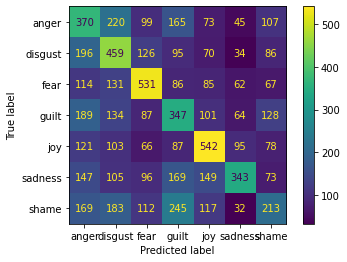

0.37320383182543904
(0.38017345209262415, 0.37281206045241894, 0.3709408918754234, None)


In [27]:
klasifikasi('poly')

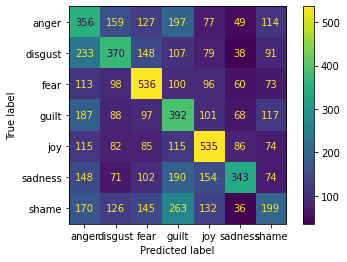

0.3633581692389569
(0.36992618140366923, 0.36303451377951795, 0.36063703460855867, None)


In [28]:
klasifikasi('rbf')

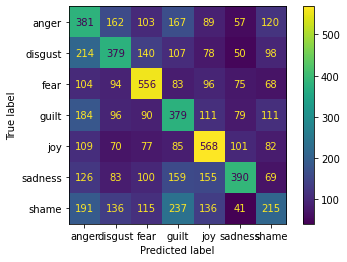

0.3815859499733901
(0.38272718062638794, 0.38109393568564726, 0.3783692441183776, None)


In [29]:
klasifikasi('linear')